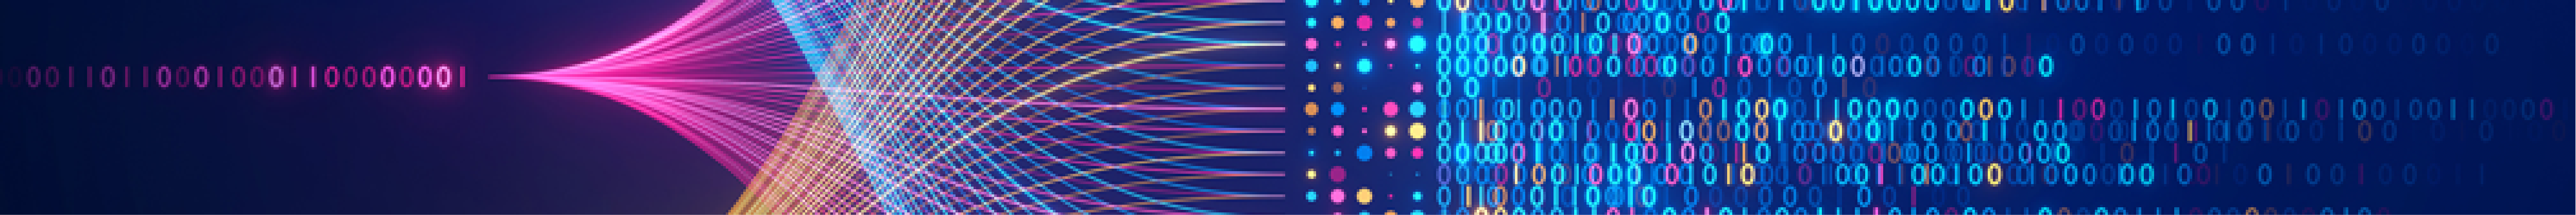
# Welcome to Week 1!
This week, you will learn about linear regression, including polynomial terms, multicollinearity, interaction terms, and continuous and categorical features. You will apply these ideas to your Integrated Capstone Project’s dataset and include your results as part of Milestone One due in Week 7. 

## Learning Objectives
At the end of this week, you should be able to: 
- Perform polynomial and interaction terms in linear regression. 
- Detect multicollinearity using a variance inflation factor or correlation. 
- Apply continuous and categorical features in linear regression. 
- Design an optimal modeling strategy that selects between polynomial terms, interactive terms, and/or continuous and categorical features based on dataset characteristics

## 1.1 Lesson: Polynomial and Interaction Terms
As part of building up to your Integrated Capstone Project, you should be able to find linear relationships in your datasets. If you have a significant amount of data (i.e., significantly more samples than features), it may be helpful to incorporate polynomial terms and interaction terms as well. However, you will have to check whether there is multicollinearity, perhaps using a variance inflation factor or measuring the correlations between the features.

### Linear Regression: A Review
You have performed linear regression many times before; here are a few reminders as to how that was done:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df_X = pd.DataFrame(np.random.normal(0, 1, (100, 5))) 
y_true = df_X.sum(axis = 1) + np.random.normal(0, 1, (100,)) 
df_X = sm.add_constant(df_X) 
model = sm.OLS(y_true, df_X) 
results = model.fit() 
print(results.params)

const   -0.041122
0        0.928649
1        1.066692
2        1.143128
3        0.853448
4        0.947384
dtype: float64


in the case above, we are using `add_constant` to create an intercept

on the other hand, to do the same thing in sklearn we might:

In [3]:
from sklearn.linear_model import LinearRegression

df_X = pd.DataFrame(np.random.normal(0, 1, (100, 5))) 
y_true = df_X.sum(axis = 1) + np.random.normal(0, 1, (100,)) 
model = LinearRegression() 
model.fit(df_X, y_true) 
model.coef_ 

array([1.03433853, 1.11539181, 0.98468307, 1.07410482, 1.00113071])

Sklearn does not require you to add an intercept; it will do so by default.

## Polynomial Terms
Suppose you work for a company that provides online music. You want to perform a linear regression that describes the user engagement rate compared with the music’s default volume. 

However, in this case, it would be unrealistic to expect a simple linear regression to work. Users might disengage at very low and very high default volumes. Perhaps, the best fit would be a quadratic one, with an inverted parabola displaying the desired behavior (Figure 1). 

We could do this as a linear regression if one of the features is $\text{volume}^2$ rather than volume.

![W1_Polynomial and Interaction Terms_1.png](<attachment:W1_Polynomial and Interaction Terms_1.png>)

To add polynomial terms, we would simply add columns whose value is equal to a polynomial, such as the square or cube of another column:
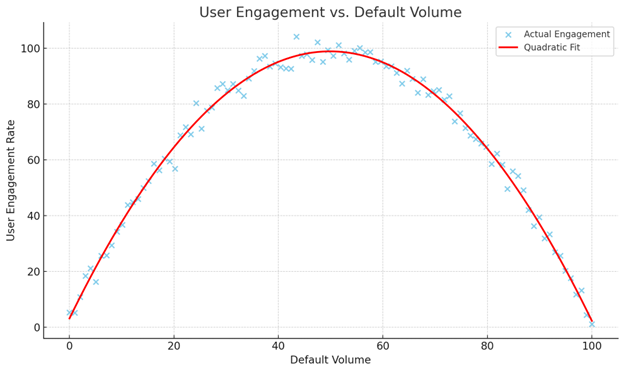

In [4]:
cols = ["A", "B", "C", "D", "E"] 
df_X = pd.DataFrame(np.random.normal(0, 1, (100, 5)), columns = cols) 
df_X_with_square = pd.concat((df_X, (df_X**2).rename(columns = {f"{var}": f"{var}2" for var in cols})), axis = 1) 
y_true = df_X_with_square.sum(axis = 1) + np.random.normal(0, 1, (100,)) 
df_X_with_square = sm.add_constant(df_X_with_square) 
model = sm.OLS(y_true, df_X_with_square) 
results = model.fit() 
print(results.params)

const    0.021103
A        1.044840
B        1.052591
C        1.032893
D        1.005266
E        0.885360
A2       0.976031
B2       1.077807
C2       1.044983
D2       0.984568
E2       1.005159
dtype: float64


In [5]:
df_X_with_square.head()

const         A         B         C         D         E        A2  \
0    1.0  0.802238  1.359803 -1.044922  0.356555  0.007637  0.643586   
1    1.0  0.654489  1.253869  1.030931  0.125558  0.303115  0.428356   
2    1.0 -0.956793 -0.243543  0.264446 -2.173281 -1.244726  0.915452   
3    1.0  0.538367  0.028885 -0.767856 -0.689805  0.922322  0.289839   
4    1.0 -0.691346 -0.704815 -0.889659 -0.195017 -1.695058  0.477960   

         B2        C2        D2        E2  
0  1.849064  1.091862  0.127131  0.000058  
1  1.572189  1.062819  0.015765  0.091879  
2  0.059313  0.069932  4.723152  1.549343  
3  0.000834  0.589602  0.475830  0.850677  
4  0.496764  0.791493  0.038032  2.873220

### Avoiding Overfitting
Continuing with our online music scenario, you are again trying to fit the relationship between music volume and user engagement. Your dataset contains 100 samples of data. Why, you ask, should we not just include all of the first 100 polynomial terms: $X, X^2, X^3, \dots, X^{100}$

With a 100-th degree polynomial, we could fit the user engagement to the music volume exactly, but we would likely be overfitting to the underlying data. Just as with any overly complex model, if we use too many polynomial terms, we may overfit.

To avoid overfitting, we need to choose the correct degree of the polynomial. To do this, we could use cross validation and test different possible degrees. 

Alternatively, we could limit ourselves to a degree that seems reasonable. Thus, if there is a good argument that the relationship should be linear, then we might stick with linear features. We can also avoid overfitting by using Lasso regression, but that is a topic we will discuss next week.

## Multicollinearity
If $X$ has a small range of values, then $X$ and $X^2$ are collinear. *Multicollinearity* makes the standard errors large and the coefficients unstable.

For example, if our dataset contains $X$ values are `10, 11, 12, 13, 14`, then our $X^2$ values are `100, 121, 144, 169, 196`.

In that case, the rations between $X^2$ and $X$ are just `10, 11, 12, 13, 14`. Plotting $X$ vs $X^2$ almost gives a straight line with a slope of about 12.

The problem then, is that a relationship like $Y \; = \; \beta X$ and $Y \; = \; \frac{ \beta X^2 }{12}$ will look about the same, and it will be impossible to tell which is the right one. 

Even worse, we could get relationships with large coefficients, like $ Y \; = \; Z^2 - 24X + 144$. These might describe data with relatively small numbers, like

$X = (10, 11, 12, 13, 14)$

$Y = (4, 1, 0 , 1, 4)$

Sometimes, the same data can seem to be described by very large or very small coefficients. 

To mitigate this issue, we can detect multicollinearity using a **variance inflation factor (VIF)** (statsmodels, `variance_inflation_factor`), where a **VIF greater than 5** can indicate a problem. 

Each feature gets its own VIF, which is calculated by comparing it to the other features. The VIF has the advantage that it will detect multicollinearity that comes from a combination of more than one feature. Alternatively, we can just find the correlation of each feature with each other feature.

Thus, if there are three features: 

$X1$, $X2$, and $X3$, 

and 

$X1 \; = \; X2 + X3$ precisely, 

then the **VIF** of $X1$ will be very high (in this case it would actually be infinite), 

Neither the **correlation** of $X1$ and $X2$, or $X1$ and $X3$ will be perfect, which would only be seen by combining $X2$ and $X3$. 

## Interaction Terms
Going back to our online music scenario, let’s now consider a different situation. 

Suppose the volume interacts with the user’s level of experience. 

Users who use the service a lot do not care about the initial volume. They will just turn it up or down to suit their preferences. However, users who are new will quit if the volume is initially too loud or soft. 

In this case, to model the situation as a regression, we’d have to include an **interaction term** between the initial volume and the user’s experience.

**Interaction Terms** involve a features that is like $X1 * X2$, where $X1$ and $X2$ are two features in the dataset.
- Interaction terms typically require a very large sample size for statistical power. This is because we not only need a range of values for $X1$ and for $X2$, but also a range of $X2$ values for each $X1$ (some writers say you need about 16 times the sample size to estimate an interaction term as opposed to estimating $X1$ alone).
- With interaction terms, it is not enough to notice that $Y$ varies with $X1$, it must vary with $X1$ in a way that depends on $X2$.

### Interpreting and Visualizing Interaction Terms
An interaction term $\beta * X1 * X2$ means that if we increase $X1$ by 1 point, the slope of the relationship with $X2$ increases by $\beta$. We can visualize an interaction term by plotting one regression line per value of the 2nd variable. 

For example, we can plot $Y$ while fixing $X2$. Thus, the independent variable is $X1$, and the slope is $\beta * X2$. 

By plotting this line for different values of $X2$, we get a picture of the relationship. 

### Continuous and Categorical Features
We can perform linear regression with categorical features by one-hot encoding them.

For example, 

if $X$ can be `Animal`, `Mineral`, or `Vegetable`, 

we could create an Animal column (equals `1` if `X` = `Animal`) and a Mineral column (equals `1` if `X` = `Mineral`).

There is some unavoidable inefficiency here in the representation, since Animal = `1` and Mineral = `1` cannot happen at the same time.

Note that if the target ($Y$) is categorical, then we have a problem. It is usually not a good idea to compute a value of 0 or 1 as the target of a linear regression because the output of a linear regression is usually not limited to 0 or 1.

### Think About It
- Why do interaction terms require a large sample size? 
- When do polynomial terms tend to produce multicollinearity? 
- Why would we use a VIF instead of correlation to detect multicollinearity? 
- Why would we use correlation instead of a VIF? 

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import statsmodels.formula.api as sms
from matplotlib import pyplot as plt

# Load the R mtcars dataset from a URL
df = pd.read_csv('https://raw.githubusercontent.com/LOST-STATS/lost-stats.github.io/source/Data/mtcars.csv')

# Include a linear, squared, and cubic term using the I() function.
# N.B. Python uses ** for exponentiation (^ means bitwise xor)
model1 = sms.ols('mpg ~ hp + I(hp**2) + I(hp**3) + cyl', data=df)
print(model1.fit().summary())

# Include an interaction term and the variables by themselves using *
# The interaction term is represented by hp:cyl
model2 = sms.ols('mpg ~ hp * cyl', data=df)
print(model2.fit().summary())

# Equivalently, you can request "all quadratic interaction terms" by doing
model3 = sms.ols('mpg ~ (hp + cyl) ** 2', data=df)
print(model3.fit().summary())

# Include only the interaction term and not the variables themselves with :
# Hard to interpret! Occasionally useful though.
model4 = sms.ols('mpg ~ hp : cyl', data=df)
print(model4.fit().summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     24.94
Date:                Sun, 18 May 2025   Prob (F-statistic):           9.97e-09
Time:                        20:27:32   Log-Likelihood:                -77.635
No. Observations:                  32   AIC:                             165.3
Df Residuals:                      27   BIC:                             172.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4823      5.767      7.887      0.0